<a href="https://colab.research.google.com/github/wasimarish/Target_DataAnalyst/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this dataset
**About Aerofit:**

 Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


**To do's:**

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [57]:
df=pd.read_csv('drive/MyDrive/Aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [58]:
df.shape

(180, 9)

*   Shape of a Dataframe (180,9)
*   Number of Rows=180
*   Number of Columns=9

In [59]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


*   There are no missing value in the given dataframe
*   Most of the columns are numeric except Product, Gender and Marital Status

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


# Non-Graphical Analysis: Value counts and unique attributes

**Product**

In [62]:
df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Analysis:- Aerofit produces three models.

In [63]:
Product_count=df['Product'].value_counts(normalize=True)*100
Product_count.round(2)

,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22


Among the given users, the most purchased treadmill is  KP281 44.44%, followed by KP481 and KP781

**Age**

In [64]:
df.Age.nunique()

32

In [65]:
age_count=df.Age.value_counts(normalize=True)*100
age_count.round(2)

,proportion
Age,
25,13.89
23,10.00
24,6.67
26,6.67
28,5.00
33,4.44
35,4.44
22,3.89
30,3.89


In [66]:
age_count[(age_count.index>=20)&(age_count.index<=30)].sum().round(2)

np.float64(63.89)

Approximately 64% of the user lie in the age group of 20-30 years

**Gender**

In [67]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [68]:
df.Gender.nunique()

2

In [69]:
gender_count=df.Gender.value_counts(normalize=True)*100
gender_count.round(2)

,proportion
Gender,
Male,57.78
Female,42.22


**Insight**:-Aerofit has 57.78% Male customers and 42.22% Female Customers.

**Marital Status**

In [70]:
df.MaritalStatus.unique()

array(['Single', 'Partnered'], dtype=object)

In [71]:
df.MaritalStatus.nunique()

2

In [72]:
M_S_counts=df.MaritalStatus.value_counts(normalize=True)*100
M_S_counts.round(2)

,proportion
MaritalStatus,
Partnered,59.44
Single,40.56


**Insight:**

59.44% of Aerofit customers are married, while the remaining 40.5% are single.

# Data Processing
**Missing Values and Outliers detection**

In [73]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


There is no missing values in this DataFrame

**Handling Outliers** of Income

In [74]:
df.Income.describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [75]:
q1=np.percentile(df['Income'],25)
q3=np.percentile(df['Income'],75)
print('q1=',q1)
print('q3=',q3)
IQR=q3-q1
IQR
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR
print("Upper Bound=",upper_bound)
print('Lower Bound=',lower_bound)
print('Median=',df['Income'].median())

q1= 44058.75
q3= 58668.0
Upper Bound= 80581.875
Lower Bound= 22144.875
Median= 50596.5


<Axes: xlabel='Income'>

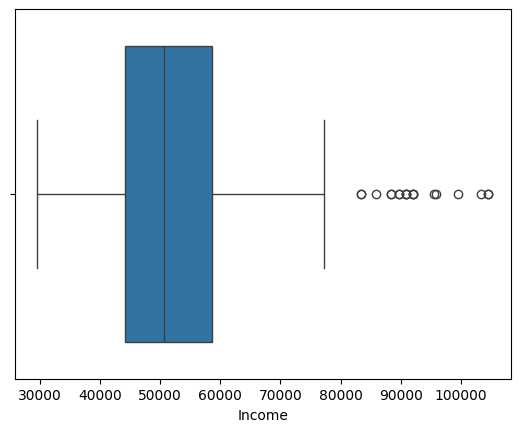

In [76]:
sns.boxplot(data=df,x='Income')

*   As we can see there are outliers in the Income Column.
*   All values > 80581.75 (upper bound) are outliers in the 'Income' column.

In [77]:
(len(df.loc[df['Income']>upper_bound])/len(df))*100

10.555555555555555

**Analysis:**

10.5 % values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.

**Handling Outliers** in Miles column

In [78]:
df.Miles.describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [79]:
q1=np.percentile(df['Miles'],25)
q3=np.percentile(df['Miles'],75)
IQR=q3-q1
print('q1 =',q1)
print('q3 =',q3)
print('IQR =',IQR)
upper_bound = q3+1.5*IQR
lower_bound = q1-1.5*IQR
print('Upper bound = ',upper_bound)
print('Lower bound = ',lower_bound)

q1 = 66.0
q3 = 114.75
IQR = 48.75
Upper bound =  187.875
Lower bound =  -7.125


<Axes: xlabel='Miles'>

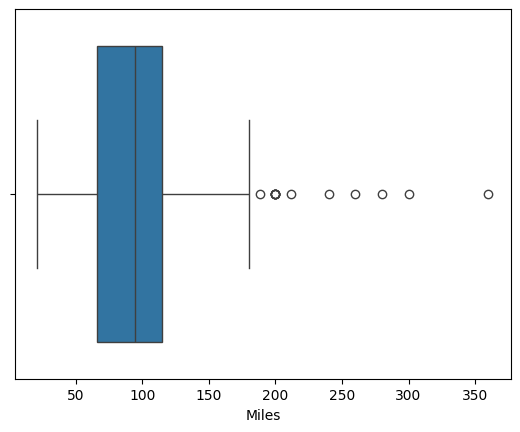

In [80]:
sns.boxplot(data=df,x='Miles')

*   As we see there are outliers in the 'Miles' column.
*   All values > 187.875 (upper bound) are outliers in the 'Miles' column

In [81]:
(len(df.loc[df['Miles']>upper_bound])/len(df))*100

7.222222222222221

7.22 % values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.

# Adding new columns Income Group and Age Group

Adding Age Group

In [82]:
df.Age.describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [83]:
df['Age_group']=pd.cut(df['Age'],bins=[17,29,39,50],labels=['Young','Middle-aged','Old'])

Age-groups:

18-29:Young

30-39:Middle-aged

40-50: Old

In [84]:
df.Age_group.value_counts()

,count
Age_group,
Young,113
Middle-aged,50
Old,17


Adding Income group

In [85]:
df.Income.describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [86]:
df['Income_group']=pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low','Medium','High'])

In [87]:
df.Income_group.value_counts()

,count
Income_group,
Low,83
Medium,76
High,21


In [88]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low


Distribution of Treadmill among Customers

<ipython-input-89-2e2e558a12b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Product'],palette='pastel')


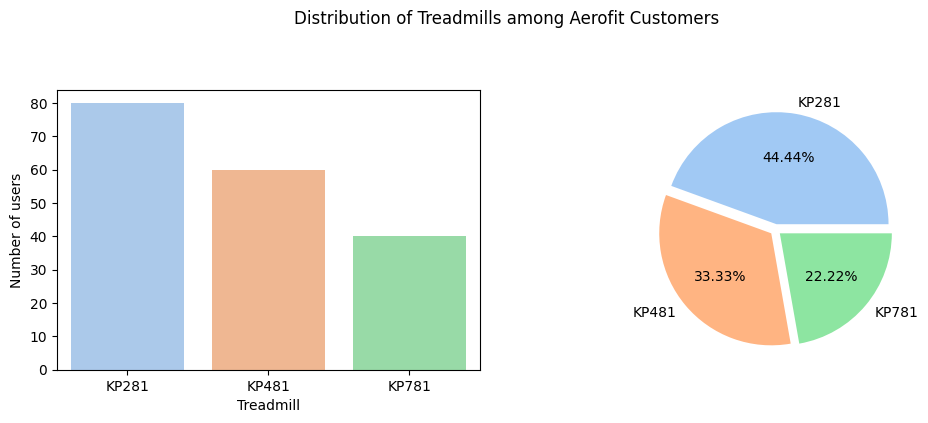

In [89]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data=df,x=df['Product'],palette='pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of users')
plt.subplot(2,2,2)
plt.pie(df['Product'].value_counts(), labels=df['Product'].unique(),explode= (0.05,0.05,0.05),colors=sns.color_palette('pastel'), autopct='%.2f%%')
plt.suptitle('Distribution of Treadmills among Aerofit Customers')
plt.show()

**Insight:**

1.   Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.
2.   KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
3.   33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.
4.   KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.

**Recommendations:**


1.   Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.
Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.
2.   Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.

3.   Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they enhance the workout experience, making it worth the investment.









**Distribution of Gender among customer**

<ipython-input-90-bb49b832486f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Gender'],palette='pastel')


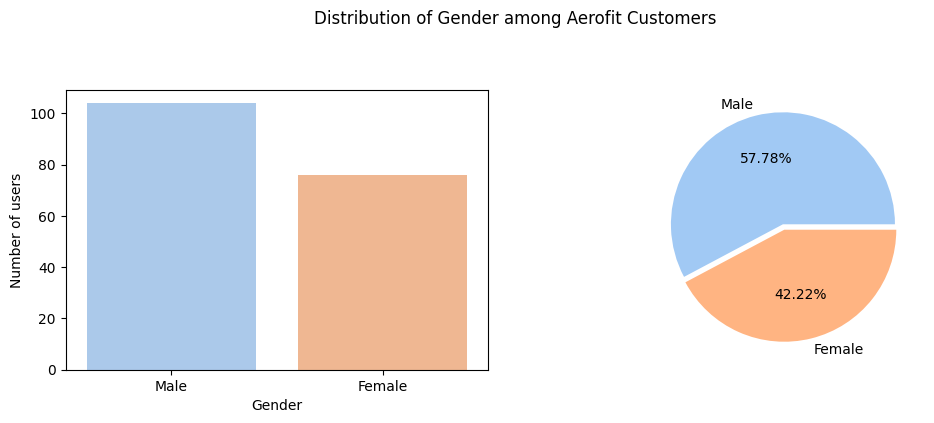

In [90]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data=df,x=df['Gender'],palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(),explode= (0.05,0),colors=sns.color_palette('pastel'), autopct='%.2f%%',)

plt.suptitle('Distribution of Gender among Aerofit Customers')
plt.show()


**Insight:**

Aerofit has 57.78% male customers and 42.22% female customers.

**Recommendations:**

Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.
Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.
Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.

Distribution of Martial status of among Aerofit customers

<ipython-input-91-2bc658fb1b62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='MaritalStatus',palette='pastel')


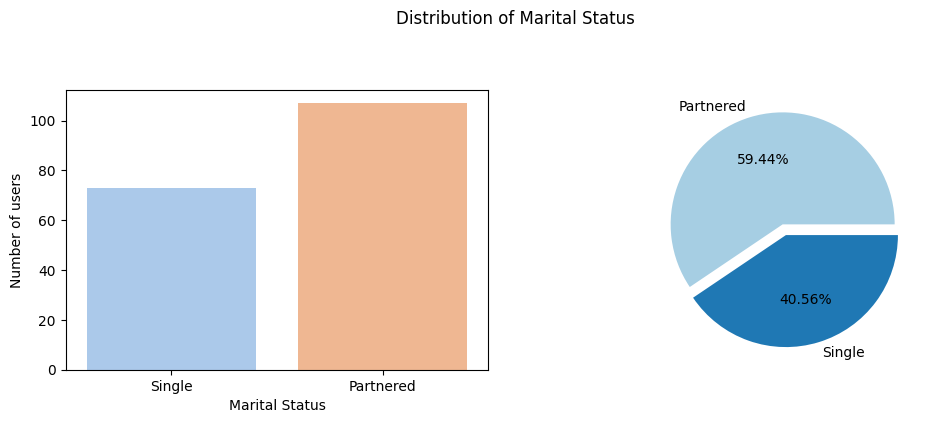

In [91]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df,x='MaritalStatus',palette='pastel')
plt.xlabel('Marital Status')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['MaritalStatus'].value_counts(), labels=['Partnered','Single'],explode= (0.05,0.05),colors=sns.color_palette('Paired'), autopct='%.2f%%',)

plt.suptitle('Distribution of Marital Status')
plt.show()

**Insight:**

59.4% of Aerofit customers are married, while remaining 40.56% are single.

Distribution of Age-group across Aerofit customers

<ipython-input-92-c3ded12a5984>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Age_group',palette='pastel')


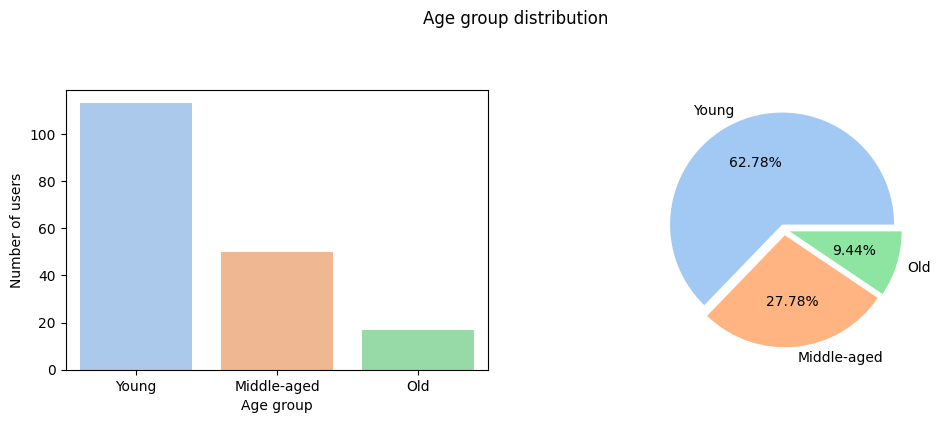

In [92]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df,x='Age_group',palette='pastel')
plt.xlabel('Age group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Age_group'].value_counts(), labels=df['Age_group'].unique(),explode= (0.05,0.05,0.05),colors=sns.color_palette('pastel'), autopct='%.2f%%',)

plt.suptitle('Age group distribution')
plt.show()

**Insight:**

Most of the Aerofit customer falls under young age-group (18-29).
27.78 % of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.

**Recommendation**
Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyl

<ipython-input-93-216b9d2eaaec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Income_group',palette='pastel')


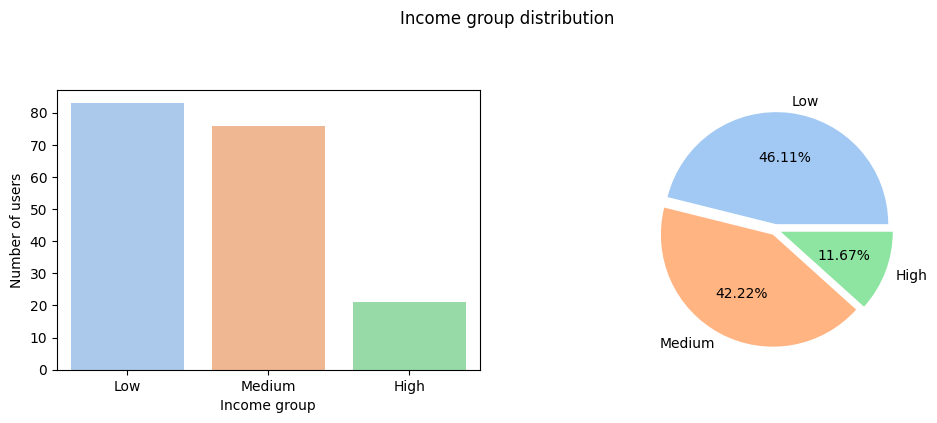

In [93]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df,x='Income_group',palette='pastel')
plt.xlabel('Income group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Income_group'].value_counts(), labels=df['Income_group'].unique(),explode= (0.05,0.05,0.05),colors=sns.color_palette('pastel'), autopct='%.2f%%',)

plt.suptitle('Income group distribution')
plt.show()

Insight:

Approximately 88% of Aerofit customers belong to the low-income (29000-50000 ) and medium-income (51000-75000 ) groups.
Remaining 11.67% belongs to High income group (above 75000).

In [94]:
a=df.groupby(['Product','Income_group'])['Product'].value_counts()
a

<ipython-input-94-d933264fc120>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=df.groupby(['Product','Income_group'])['Product'].value_counts()


Product  Income_group
KP281    Low             48
         Medium          32
         High             0
KP481    Low             30
         Medium          30
         High             0
KP781    Low              5
         Medium          14
         High            21
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Product by Income Group')

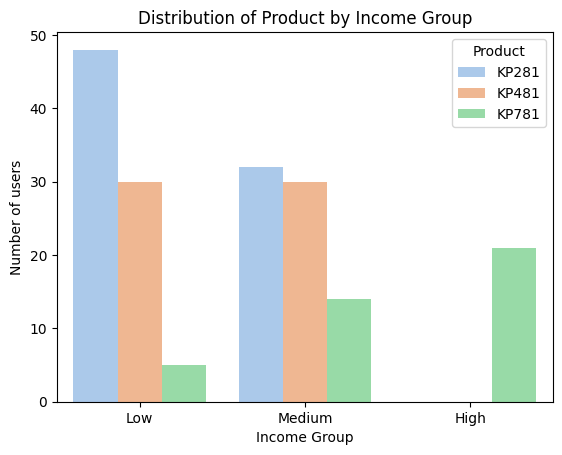

In [95]:
sns.countplot(data=df,x='Income_group',hue='Product',palette='pastel')
plt.xlabel('Income Group')
plt.ylabel('Number of users')
plt.title('Distribution of Product by Income Group')

**Insight**

Customer preference for fitness equipment varies significantly by income level. KP281 is favored by low- and medium-income customers, while KP781 is exclusively preferred by high-income customers. Medium-income customers also show interest in KP481.

Text(0.5, 1.0, 'Distribution of Product by Age Group')

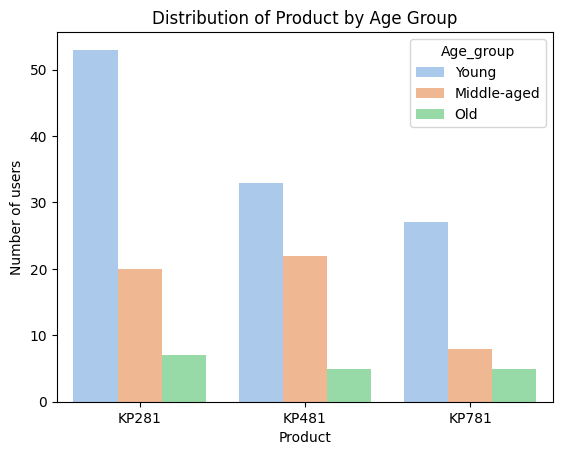

In [96]:
sns.countplot(data=df,x='Product',hue='Age_group',palette='pastel')
plt.xlabel('Product')
plt.ylabel('Number of users')
plt.title('Distribution of Product by Age Group')

**Insight**

*   KP281 is favored by young users.
*   "Old" age group shows lowest usage across products.
*   KP781 has limited appeal to younger demographics.

**Recommendation**


*   Target young users with KP281 and KP481  marketing.
*   Increase KP781 appeal to younger/middle-aged groups to increase sales in this group.
*   Explore reasons for low usage in the "Old" demographic and address them.
Avertise the benefits of product on health.


Text(0.5, 1.0, 'Distribution of Product by Marital Status')

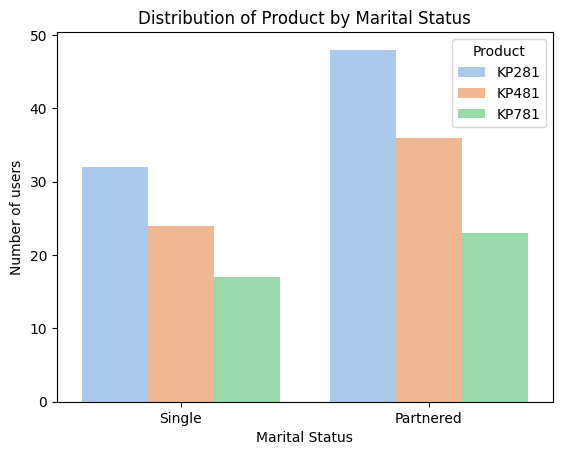

In [97]:
sns.countplot(data=df,x='MaritalStatus',hue='Product',palette='pastel')
plt.xlabel('Marital Status')
plt.ylabel('Number of users')
plt.title('Distribution of Product by Marital Status')

**Insight**

Married customers have a higher frequency of purchasing all treadmills compared to single customers.

The trend observed among both married and single customers reflects that KP281, being an entry-level treadmill, is the most frequently purchased option, while KP781, due to its higher cost, remains the least popular choice for both customer groups.

The purchase frequency for both married and single customers follows the trend of KP281 > KP481 > KP781, with KP281 being the most frequently purchased treadmill and KP781 being the least frequently purchased one.

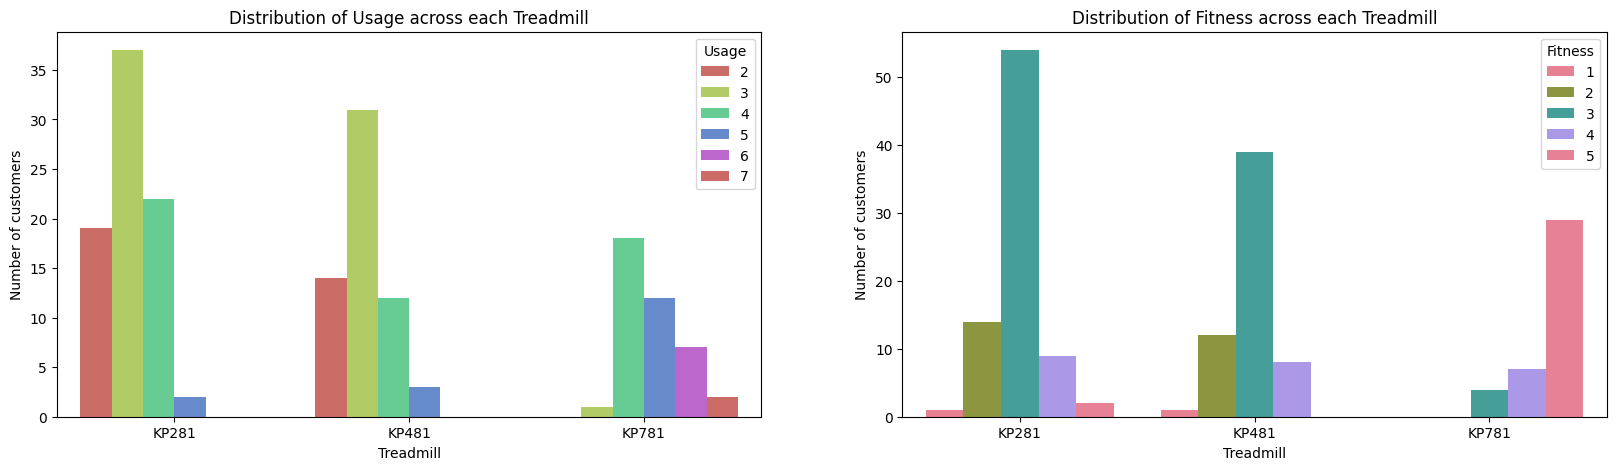

In [98]:
plt.figure(figsize=(20,5))
# Usage column
plt.subplot(1,2,1)
sns.countplot(data=df,x='Product',hue='Usage',palette='hls')
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Usage across each Treadmill')

# Fitness column
plt.subplot(1,2,2)
sns.countplot(data=df,x='Product',hue='Fitness',palette='husl')
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Fitness across each Treadmill')

plt.show()

**Insight:**

*   Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
*   Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.


Text(0.5, 1.0, 'Distribution of Product by Gender')

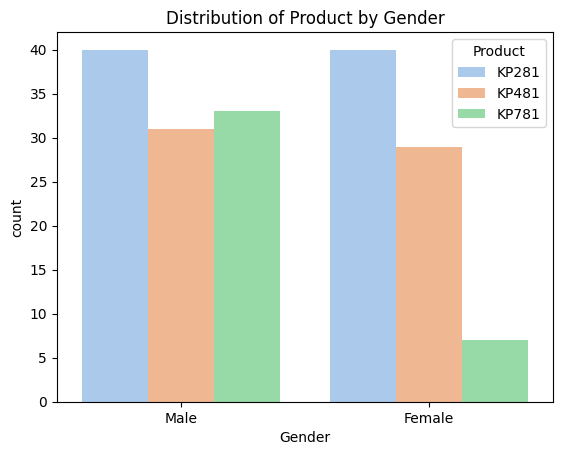

In [99]:
sns.countplot(data=df,x='Gender',hue='Product',palette='pastel')
plt.title('Distribution of Product by Gender')

**Insight**

Both male and female customers prefer using the KP281 treadmill due to its entry-level status and cost-effectiveness compared to the other two options.

Both male and female customers equally prefer the KP481 treadmill as it offers the best value for money among the other two options.

Among male customers, the KP781 treadmill is the most preferred due to its advanced features following the KP281.

# Conditional And Marginal Probabilities

**Impact of Gender on purchasing treadmill**

In [100]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,margins_name='Total',normalize=True).round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


**Marginal Probablities**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Male)= 0.58
* P(Female)= 0.42

**Conditional Probablities**

* P(KP281|Male) = 0.22
* P(KP281|Female) = 0.22
* P(KP481|Male) = 0.17
* P(KP481|Female) = 0.16
* P(KP781|Male) = 0.18
* P(KP781|Female)= 0.04

**Impact of marital status on purchasing the Treadmill**

In [101]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,margins_name='Total',normalize=True).round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


**Marginal Probablities**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Patnered)= 0.59
* P(Single)= 0.41

**Conditional Probablities:**

* P(KP281|Partnered) = 0.27
* P(KP281|Single) = 0.18
* P(KP481|Partnered) = 0.20
* P(KP481|Single) = 0.13
* P(KP781|Partnered) = 0.13
* P(KP781|Single)= 0.09

**Impact of Age groups on purchasing the treadmill**

In [102]:
pd.crosstab(index=df['Product'],columns=df['Age_group'],margins=True,margins_name='Total',normalize=True).round(2)

Age_group,Young,Middle-aged,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


**Age-groups:**

* 18-29 : Young
* 30-39 : Middle-aged
* 40-50 : Old

**Marginal Probablities**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Young)= 0.63
* P(Middle-aged)= 0.28
* P(Old)= 0.09

**Conditional Probablities:**

* P(KP281|Young) = 0.29
* P(KP281|Middle-aged) = 0.11
* P(KP281|Old) = 0.04
* P(KP481|Young) = 0.18
* P(KP481|Middle-aged) = 0.12
* P(KP481|Old)= 0.03
* P(KP781|Young) = 0.15
* P(KP781|Middle-aged) = 0.04
* P(KP781|Old)= 0.03


**Impact of Income groups on purchasing the treadmill**

In [105]:
pd.crosstab(index=df['Product'],columns=df['Income_group'],margins=True,margins_name='Total',normalize=True).round(2)

Income_group,Low,Medium,High,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
Total,0.46,0.42,0.12,1.00


**Income-groups:**

* 29000-50000 : Low
* 51000-75000 : Medium
* 76000-105000 : High

**Marginal Probablities**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Low)= 0.46
* P(Medium)= 0.42
* P(High)= 0.12

**Conditional Probablities:**

* P(KP281|Low) = 0.27
* P(KP281|Medium) = 0.18
* P(KP281|High) = 0.00
* P(KP481|Low) = 0.17
* P(KP481|Medium) = 0.17
* P(KP481|High)= 0.00
* P(KP781|Low) = 0.03
* P(KP781|Medium) = 0.08
* P(KP781|High)= 0.12

What is the probability that a customer purchased a particular treadmill product (KP281, KP481, KP781) given that they runs 80 miles per week?

In [106]:
# Total number of customers
total=len(df)
products=['KP281','KP481','KP781']
miles=80

#calculating the probablity for each product and fitness level
probablities={}

for product in products:
    #calculating the number of customers who purchased the specific product

    total_miles=len(df.loc[df['Miles']==miles])

    #calculating the number of customers who purchased the specific product and runs 80 miles per week

    total_product_miles=len(df.loc[(df['Product']==product)&(df['Miles']==miles)])

    #calculating the conditional probablity

    conditional_probablity=total_product_miles/total_miles

    #storing the conditional probablity in the dictionary

    probablities[product]=conditional_probablity


for product,probablity in probablities.items():
    print(f'Probablity of customer  purchased a {product} given that they runs a {miles} miles per week:{round(probablity,2)}')

Probablity of customer  purchased a KP281 given that they runs a 80 miles per week:0.0
Probablity of customer  purchased a KP481 given that they runs a 80 miles per week:0.0
Probablity of customer  purchased a KP781 given that they runs a 80 miles per week:1.0


What is the probability that a customer purchased a particular treadmill product (KP281, KP481, KP781) given that they use treadmill 3 times in a week?

In [107]:
# Total number of customers
total=len(df)
products=['KP281','KP481','KP781']
usage=3

#calculating the probablity for each product and fitness level
probablities={}

for product in products:
    #calculating the number of customers who purchased the specific product

    total_usage=len(df.loc[df['Usage']==usage])

    #calculating the number of customers who purchased the specific product and uses treadmill 3 times in a week

    total_product_miles=len(df.loc[(df['Product']==product)&(df['Usage']==usage)])

    #calculating the conditional probablity

    conditional_probablity=total_product_miles/total_usage

    #storing the conditional probablity in the dictionary

    probablities[product]=conditional_probablity


for product,probablity in probablities.items():
    print(f'Probablity of customer  purchased a {product} given that they uses treadmill  {usage} times in a week:{round(probablity,2)}')

Probablity of customer  purchased a KP281 given that they uses treadmill  3 times in a week:0.54
Probablity of customer  purchased a KP481 given that they uses treadmill  3 times in a week:0.45
Probablity of customer  purchased a KP781 given that they uses treadmill  3 times in a week:0.01


# Customer Profiling

**Potential Buyers for KP281 Treadmill**

1. Gender : Male and Female
2. Marital status: Both Partnered or single
3. Age:18-29 as probablity of old customers purchasing the KP281 is low
4. Income:29000-50000 USD as probability of customers belonging to high income
   group purchasing the KP281 treadmill is 0.
5. Education:14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 60-100 miles per week

**Potential Buyers for KP481 Treadmill**

1. Gender : Both Male and Female
2. Marital status: Both Partnered or single
3. Age:18-39 years
4. Income:29000-75000 USD as probability of customers belonging to high income group purchasing the KP481 treadmill is 0.
5. Education:14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 80-120 miles per week --> Mostly midrunners.

**Potential Buyers for KP781 Treadmill**

1. Gender : Only male customers as probablity of female customers buying KP781 is very low.
2. Marital status: Only married customers as probablity of single customers buying KP781 is also low.
3. Age:18-39 years
4. Income:75000-105000 USD as probability of customers belonging to low and middle-income groups purchasing the KP781 treadmill is very low.
5. Education:16-18 years
6. Fitness level':5
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 120 200 miles per week --> Mostly hardcore runners.

# Insight

**1. Product Preference Overview:-**

 * KP281 is the most popular treadmill (44.44%), likely due to its entry-level positioning and affordability.
 * KP481 (33.33%) caters to mid-level runners, while KP781 (22.22%) is the least preferred overall.

**2. Gender-Based Preferences:**

 * Both male (57.78%) and female (42.22%) customers show a preference for KP281, but female customers have a very low probability of purchasing KP781 (9.2%).
 * Men show a more balanced interest across all models, with KP781 being favored by a slightly higher percentage (31.7%) compared to KP481 (29.8%).

**3. Customer Demographics:**

 * A majority of Aerofit customers are married (59.4%), and they tend to purchase treadmills more frequently than single customers (40.56%).
 * The general purchase trend across both groups is KP281 > KP481 > KP781, highlighting the popularity of the entry-level model.

**4.Age Group Analysis (Young):**

 * The largest customer segment is young adults (18-29), who exhibit a strong preference for KP281 (46.9%).
 *While KP481 (29.2%) and KP781 (23.9%) have some appeal, KP281 is the clear leader in this group.

**5.Age Group Analysis (Middle-aged & Old):**

 * Middle-aged customers (30-39) surprisingly favor KP481 (44%), followed by KP281 (40%), with KP781 (16%) being the least preferred.
 *Older customers (40-50) show a preference for KP281 (41.2%), with KP481 and KP781 having similar, lower purchase rates (29.4% each).

**6.Purchase Probability by Age:**

 * Purchase probability for KP281 is highest among young adults (29%) and decreases with age (Middle-aged: 11%, Old: 4%).
 * A similar trend is observed for KP481 and KP781, with older customers having the lowest purchase probabilities for all models.

**7.Income and Product Preference:**

 * The majority of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups (88%), while only 11.67% are high-income (above 75000 USD).
 * High-income customers exclusively prefer the KP781 model, likely due to its advanced features and higher price point.

**8.Education and Runner Type:**

 * Customers with 14-16 years of education tend to prefer KP281 and KP481, while those with 16-18 years of education show a stronger preference for the advanced KP781.
 * Runner preferences align with product features: entry-level runners (60-100 miles/week) prefer KP281, mid-level (60-120 miles/week) prefer KP481, and hardcore runners (120-200 miles/week) prefer KP781

# Recommendation

* A better, high-end, premium product for highly-educated, high income and active customers to increase revenue.
* Campaigns to promote KP781 product for females specially
* Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales
* To increase KP781 purchases among women, targeted incentives and discounts, such as limited-time promotions or personalized offers, should be offered to enhance the product's appeal and accessibility.
* To boost KP781 sales, launch targeted marketing campaigns (social media, fitness forums, influencers) that emphasize its advanced features and benefits, justifying its higher price and increasing customer awareness.
* To attract more customers, emphasize the KP281's budget-friendly nature and entry-level features through targeted online fitness community engagement and special offers.